In [127]:
import pandas as pd

In [128]:
# Pandas 의 Series 생성
series1 = pd.Series([1,2,3,4,5])
series1

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [129]:
# 인덱스 지정해서 Series 생성
series2 = pd.Series([1,2,3,4,5], index= ['일','이','삼','사','오'])
series2

일    1
이    2
삼    3
사    4
오    5
dtype: int64

In [130]:
population = pd.Series([9904312,3448737,2890451,2466052], 
                       index=['서울','부산','인천','대구'])
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [131]:
# Series 정보 확인
# 값, 인덱스, 타입
# values, index, dtype
population.values # 값 확인

array([9904312, 3448737, 2890451, 2466052], dtype=int64)

In [132]:
population.index # 인덱스 확인

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [133]:
population.dtype # 타입 확인

dtype('int64')

In [134]:
# Series의 컬럼 이름 지정
population.name = '인구'
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [135]:
# 인덱스 이름 지정
population.index.name = '도시'
population

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [136]:
# 시리즈 연산 
population / 1000000

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

In [137]:
# 시리즈 인덱싱
population[1] # 인덱스 번호 사용

3448737

In [138]:
population['부산'] # 지정한 인덱스 사용

3448737

In [139]:
# 리스트를 활용한 인덱싱
# 순서 횟수에 상관 없음
population[ ['인천','서울','인천','부산'] ]

도시
인천    2890451
서울    9904312
인천    2890451
부산    3448737
Name: 인구, dtype: int64

In [140]:
population[[0,3,1]]

도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [141]:
# Boolean 인덱싱
# 인구수가 250만 이상인 도시의 정보 출력
a = population >= 2500000
print(population[a])

도시
서울    9904312
부산    3448737
인천    2890451
Name: 인구, dtype: int64


In [142]:
# 인구수가 500만 이하인 도시의 정보 출력
b = population <= 5000000
print(population[b])

도시
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64


In [143]:
# 인구수가 250만 이상이고 500만 이하인 도시 정보 출력
print(population[(population >= 2500000) & (population <= 5000000)])
c = a & b
population[c]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64


도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [144]:
population[population<=5000000][population>=2500000]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [145]:
# 슬라이싱
# 인덱스 번호로 슬라이싱(첫번째 숫 : 끝 수 + 1)
# 지정한 이름으로 슬라이싱(첫번째 값 : 끝나는 값)
print(population[1:3])
population['부산':'인천']

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64


도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [146]:
# 딕셔너리 객체로 Series 생성
# 인덱스 부여가 자동으로 완성
# key = 인덱스
# values = 값
data = {'서울':9631482,'부산':3393191,'인천':2632035,'대전':1490158}
population2 = pd.Series(data)
population2

서울    9631482
부산    3393191
인천    2632035
대전    1490158
dtype: int64

In [147]:
# population2 : 2010년 인구
# population : 2015년 인구
# 2015년도와 2010년도의 인구 증가률 계산
# 같은 인덱스의 값을 가지고 있는 것들끼리 계산
ds = population - population2

In [148]:
print(population.index)
print(population2.index)

Index(['서울', '부산', '인천', '대구'], dtype='object', name='도시')
Index(['서울', '부산', '인천', '대전'], dtype='object')


In [149]:
# notnull() : null이 아니면 True, null이면 False
# isnull() : null이 아니면 False, null이면 True

In [150]:
ds[ds.notnull()]

부산     55546.0
서울    272830.0
인천    258416.0
dtype: float64

In [151]:
ds[ds.isnull()]

대구   NaN
대전   NaN
dtype: float64

In [152]:
# 2015년도와 2010년도의 인구 증가율 계산
# 단, 없는값은 출력 X
# (2015년 인구 - 2010년 인구) / 2010년인구 * 100
popu = (population - population2) / population2 * 100
print(popu[popu.notnull()])

부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64


In [153]:
((population - population2) / population2 * 100)[((population - population2) / population2 * 100).notnull()]

부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

In [154]:
# Series값 갱신 추가 삭제
# 대구 값 갱신 (원래있던 인덱스)
popu['대구']=1.41

In [155]:
popu

대구    1.410000
대전         NaN
부산    1.636984
서울    2.832690
인천    9.818107
dtype: float64

In [156]:
# 값 추가 (새로운 인덱스)
popu['광주']=2.08
popu

대구    1.410000
대전         NaN
부산    1.636984
서울    2.832690
인천    9.818107
광주    2.080000
dtype: float64

In [157]:
# 값 삭제
del popu['대전']

In [158]:
popu

대구    1.410000
부산    1.636984
서울    2.832690
인천    9.818107
광주    2.080000
dtype: float64

### DataFrame

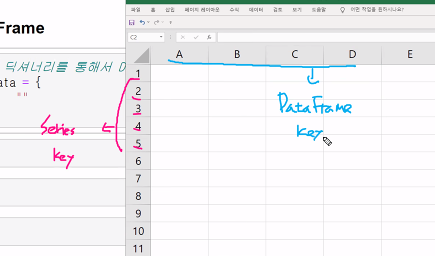

In [159]:
# 딕셔너리를 통해서 DataFrame만들기
data = {
    "2015" : [9904312,3448737,2890451,2466052],
    "2010" : [9631482,3393191,2632035,2431774]
}

df = pd.DataFrame(data)
df

,2015,2010
0,9904312,9631482
1,3448737,3393191
2,2890451,2632035
3,2466052,2431774


In [160]:
# DataFrame 생성후 index 설정
df.index = ['서울','부산','인천','대구']
df

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [161]:
# DataFrame 생성시 index 지정, columns 지정
data = [
    [9904312,3448737,2890451,2466052],
    [9631482,3393191,2632035,2431774]
]

ind = ['2015','2010']
col = ['서울','부산','인천','대구']

df3 = pd.DataFrame(data, index = ind, columns = col)
df3

,서울,부산,인천,대구
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774


In [162]:
data = [
    [9904312,9631482],
    [3448737,3393191],
    [2890451,2632035],
    [2466052,2431774]
]
ind = ['서울','부산','인천','대구']
col = ['2015','2010']

df2 = pd.DataFrame(data, index = ind, columns = col)
df2

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [163]:
data = {
    "2015" : [9904312,3448737,2890451,2466052],
    "2010" : [9631482,3393191,2632035,2431774]
}

df = pd.DataFrame(data , index=['서울','부산','인천','대구'])
df

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [164]:
# 전치
# T : 데이터프레임의 속성
# transpose() : 전치가 가능한 모든 데이터에 적용 가능
# 출력만 하고 저장은 안됨

df3 = df3.T
df3

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [165]:
# 데이터프레임 정보 확인
# 값 확인 : values
# 인덱스 확인 : index
# 컬럼 확인 : columns

In [166]:
df2.values

array([[9904312, 9631482],
       [3448737, 3393191],
       [2890451, 2632035],
       [2466052, 2431774]], dtype=int64)

In [167]:
df2.index

Index(['서울', '부산', '인천', '대구'], dtype='object')

In [168]:
df2.columns

Index(['2015', '2010'], dtype='object')

In [169]:
# 데이터프레임에 값 추가
# 컬럼을 기준으로 값 추가
# 기존에 가지고있는 컬럼을 입력시 값의 수정이 이루어짐
df2['2005'] = [9762546,3512547,2517680,2450000]
df2

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680
대구,2466052,2431774,2450000


In [170]:
# 인덱싱 슬라이싱 
# 컬럼으로 인덱싱하기
df2["2010"] # 하나의 컬럼 출력시 Series로 출력


서울    9631482
부산    3393191
인천    2632035
대구    2431774
Name: 2010, dtype: int64

In [171]:
# 리스트를 사용한 인덱싱
# 데이터 프레임으로 출력
df2[["2015","2005"]] 

,2015,2005
서울,9904312,9762546
부산,3448737,3512547
인천,2890451,2517680
대구,2466052,2450000


In [172]:
df2[["2010"]]

,2010
서울,9631482
부산,3393191
인천,2632035
대구,2431774


In [173]:
# 인덱스를 기준으로 하는 슬라이싱
df2[0:2]

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547


In [174]:
df2['서울':'인천']

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680


In [175]:
# 인덱서
# iloc : 인덱스 번호 사용
# loc : 지정한 인덱스 사용

In [176]:
# loc[ index,columns ]
df2.loc["서울":"부산","2015":"2010"]

,2015,2010
서울,9904312,9631482
부산,3448737,3393191


In [177]:
# iloc 인덱서를 사용해서 동일한 결과값 출력
df2.iloc[:2,:2]

,2015,2010
서울,9904312,9631482
부산,3448737,3393191


In [178]:
df2.index.name = "도시"
df2.columns.name = "연도"
df2

연도,2015,2010,2005
도시,,,
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680
대구,2466052,2431774,2450000


In [179]:
# 데이터프레임 불리언인덱싱
# 2010년 인구가 2500000명 이상인 데이터 출력
popu = df2.loc[:,'2010'] >= 2500000
print(df2.loc[popu,'2010'])

도시
서울    9631482
부산    3393191
인천    2632035
Name: 2010, dtype: int64


In [180]:
a = df2.loc[:,'2015']
b = df2.loc[:,'2010']
c = df2.loc[:,'2005']
d = a+b+c >= 10000000
df2.loc[d]

연도,2015,2010,2005
도시,,,
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547


In [181]:
# read_csv()
pn = pd.read_csv('population_number.csv', encoding='euc-kr',index_col='도시')
pn

,지역,2015,2010,2005,2000
도시,,,,,
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437
인천,수도권,2890451,2632035.0,NaN,2466338
대구,경상권,2466052,2431774.0,2456016.0,2473990


In [182]:
# 값의 갯수 세기
# value_counts
pn.loc[:,'지역'].value_counts()

수도권    2
경상권    2
Name: 지역, dtype: int64

In [183]:
# 정렬
# sort_values() : 값을 기준으로 정렬
# ascending = True 값이 기본값
pn.loc[:,'2010'].sort_values()

도시
대구    2431774.0
인천    2632035.0
서울    9631482.0
부산          NaN
Name: 2010, dtype: float64

In [184]:
# 내림차순 정렬
pn.loc[:,'2010'].sort_values(ascending = False)

도시
서울    9631482.0
인천    2632035.0
대구    2431774.0
부산          NaN
Name: 2010, dtype: float64

In [185]:
# by : 기준을 정해서 정렬
pn.sort_values(by = '2010')

,지역,2015,2010,2005,2000
도시,,,,,
대구,경상권,2466052,2431774.0,2456016.0,2473990
인천,수도권,2890451,2632035.0,NaN,2466338
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437


In [186]:
# 두개의 기준으로 데이터 살펴보기
pn.sort_values(by = ['지역','2010'])

,지역,2015,2010,2005,2000
도시,,,,,
대구,경상권,2466052,2431774.0,2456016.0,2473990
부산,경상권,3448737,NaN,NaN,3655437
인천,수도권,2890451,2632035.0,NaN,2466338
서울,수도권,9904312,9631482.0,9762546.0,9853972


In [187]:
# 인덱스 값을 기준으로 정렬
pn.sort_index(ascending = False)

,지역,2015,2010,2005,2000
도시,,,,,
인천,수도권,2890451,2632035.0,NaN,2466338
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437
대구,경상권,2466052,2431774.0,2456016.0,2473990


In [188]:
score = pd.read_csv("score.csv",index_col = '과목', encoding = 'euc-kr')
score

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [189]:
import numpy as np

In [190]:
# 학급별 과목 점수 총계
np.sum(score)

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [191]:
# 순위에 맞게 출력

aa = score.sum()
aa.sort_values(ascending = False)

2반    388
3반    295
1반    271
4반    243
dtype: int64

In [192]:
aa.sort_values()

4반    243
1반    271
3반    295
2반    388
dtype: int64

In [193]:
score

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [194]:
# 과목별 점수 총계
bb = score.T.sum()
bb

과목
수학    201
영어    282
국어    253
사회    298
과학    163
dtype: int64

In [195]:
score.sum(axis = 1)

과목
수학    201
영어    282
국어    253
사회    298
과학    163
dtype: int64

In [196]:
score.sum(axis=0)

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [197]:
score

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [198]:
score['합계'] = bb
score

,1반,2반,3반,4반,합계
과목,,,,,
수학,45,44,73,39,201
영어,76,92,45,69,282
국어,47,92,45,69,253
사회,92,81,85,40,298
과학,11,79,47,26,163


In [199]:
score['평균'] = bb/4
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45,44,73,39,201,50.25
영어,76,92,45,69,282,70.50
국어,47,92,45,69,253,63.25
사회,92,81,85,40,298,74.50
과학,11,79,47,26,163,40.75


In [200]:
score.loc[:,:'4반'].mean(axis = 1)
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45,44,73,39,201,50.25
영어,76,92,45,69,282,70.50
국어,47,92,45,69,253,63.25
사회,92,81,85,40,298,74.50
과학,11,79,47,26,163,40.75


In [201]:
score.T.mean()

과목
수학     75.375
영어    105.750
국어     94.875
사회    111.750
과학     61.125
dtype: float64

In [202]:
score.mean(axis=1)

과목
수학     75.375
영어    105.750
국어     94.875
사회    111.750
과학     61.125
dtype: float64

In [203]:
score.mean()

1반     54.20
2반     77.60
3반     59.00
4반     48.60
합계    239.40
평균     59.85
dtype: float64

In [204]:
score.loc[:,:'4반'].mean(axis=1)

과목
수학    50.25
영어    70.50
국어    63.25
사회    74.50
과학    40.75
dtype: float64

In [205]:
# 인덱스를 추가하는 방법
score.loc['반평균'] = score.mean()
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,239.4,59.85


In [206]:
score.loc['반평균'] = score.loc[:,:'4반'].mean()
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,NaN,NaN


In [207]:
score = score.drop(['반평균'])

In [208]:
score.fillna('안알려줌')

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75


In [209]:
# 과목별로 가장 큰값과 가장 작은값의 차이를 구하자

In [210]:
# 가장 큰 값 구하기
# max
score.max()

1반     92.0
2반     92.0
3반     85.0
4반     69.0
합계    298.0
평균     74.5
dtype: float64

In [211]:
max_score = score.loc[:'과학',:'4반'].max(axis=1)
max_score

과목
수학    73.0
영어    92.0
국어    92.0
사회    92.0
과학    79.0
dtype: float64

In [212]:
# 가장 작은 값 구하기
# min()
min_score = score.loc[:'과학',:'4반'].min(axis=1)
min_score

과목
수학    39.0
영어    45.0
국어    45.0
사회    40.0
과학    11.0
dtype: float64

In [213]:
max_score - min_score

과목
수학    34.0
영어    47.0
국어    47.0
사회    52.0
과학    68.0
dtype: float64

In [214]:
# apply() 함수
# 행이나 열 단위로 복잡한 처리를 하고 싶을 때 사용
# 적용시킬 데이터에 행 / 열 단위로 함수를 적용시켜줌

In [215]:
score = score.fillna('X')
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75


In [216]:
def max_min(x):
    return x.max() - x.min()

In [217]:
score.loc[:'과학',:'4반'].apply(max_min,axis=1)

과목
수학    34.0
영어    47.0
국어    47.0
사회    52.0
과학    68.0
dtype: float64

In [218]:
# 결측치를 채우는 함수
# fillna()

In [219]:
data_dic = {'A':[1,3,3,4,4], 'B':[1,2,2,3,3], 'C':[1,2,4,4,5]}
df = pd.DataFrame(data_dic)
df

,A,B,C
0,1,1,1
1,3,2,2
2,3,2,4
3,4,3,4
4,4,3,5


In [220]:
df["A"].value_counts()

3    2
4    2
1    1
Name: A, dtype: int64

In [221]:
df1 = df.apply(pd.value_counts)
df1

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [222]:
df1 = df1.fillna(100) # 값을 출력하고 저장하지 않음
df1



,A,B,C
1,1.0,1.0,1.0
2,100.0,2.0,1.0
3,2.0,2.0,100.0
4,2.0,100.0,2.0
5,100.0,100.0,1.0


In [223]:
# 카테고리 데이터 만들기
# cut(데이터, 기준, 라벨)

In [224]:
ages = [0,2,10,21,23,37,31,61,20,41,32,100]
bins = [0,15,25,35,60,99] # 구분할 기준
labels = ['미성년자','청년','중년','장년','노년']

In [225]:
pd.cut(x = ages, bins = bins, labels = labels)

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '노년', '청년', '장년', '중년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [226]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [227]:
# 데이터프레임 합치기
# concat()
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [228]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [229]:
pd.concat([df1,df4],axis=1) # 인덱스를 기준으로 데이터 합치기

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [230]:
# 같은 인덱스를 가지고있는 값만 출력
pd.concat([df1,df4],axis=1, join = 'inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [231]:
# 컬럼 초기화
pd.concat([df1,df4],axis=1, ignore_index = True)

,0,1,2,3,4,5,6
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [232]:
pd.concat([df1,df4])

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [233]:
# value를 기준으로 데이터 합치기
df5 = pd.DataFrame({'key': ['K0','K2','K3','K4'],
'A':['A0','A1','A2','A3'],
'B':['B0','B1','B2','B3']})


df6 = pd.DataFrame({'key': ['K0','K1','K2','K3'],
'C':['C0','C1','C2','C3'],
'D':['D0','D1','D2','D3']})

In [234]:
# merge
# 데이터를 기준으로 df합침
# 기준이 같은것만 출력 : how = inner
pd.merge(df5,df6,on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3


In [235]:
# 모든 데이터 출력
pd.merge(df5,df6,how='outer')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3
3,K4,A3,B3,NaN,NaN
4,K1,NaN,NaN,C1,D1


In [236]:
# how : left, right 
pd.merge(df5,df6, how = 'left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3
3,K4,A3,B3,NaN,NaN


In [237]:
pd.merge(df5,df6, how = 'right')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A1,B1,C2,D2
3,K3,A2,B2,C3,D3


In [238]:
pd.merge(df5,df6, how = 'left')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3
3,K4,A3,B3,NaN,NaN


In [271]:
#2015 파일 불러오기
df2015 = pd.read_csv('2015.csv', encoding = 'euc-kr', index_col = '관서명')
df2015

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주지방경찰청계,검거건수,18,47,758,5409,8301
광주지방경찰청계,검거인원,17,66,776,3433,11774
광주지방경찰청계,구속,9,33,42,104,58
광주지방경찰청계,불구속,1,26,511,2781,5618
광주지방경찰청계,기타,7,7,223,548,6098
광주동부경찰서,발생건수,3,5,92,1100,1155
광주동부경찰서,검거건수,4,6,86,583,970
광주동부경찰서,검거인원,4,7,98,447,1483


In [246]:
#2016 파일 불러오기
df2016 = pd.read_csv('2016.csv', encoding = 'euc-kr', index_col = '관서명')
df2016

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,17,47,701,6052,8599
광주지방경찰청계,검거건수,18,47,713,4242,7631
광주지방경찰청계,검거인원,21,54,758,3455,10747
광주지방경찰청계,구속,14,25,37,132,57
광주지방경찰청계,불구속,3,25,491,2862,5267
광주지방경찰청계,기타,4,4,230,461,5423
광주동부경찰서,발생건수,3,8,83,832,1142
광주동부경찰서,검거건수,3,7,70,679,1002
광주동부경찰서,검거인원,4,10,71,543,1497


In [248]:
#2017 파일 불러오기
df2017 = pd.read_csv('2017.csv', encoding = 'euc-kr', index_col = '관서명')
df2017

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366
광주지방경찰청계,검거건수,9,32,732,3487,7553
광주지방경찰청계,검거인원,10,61,824,3046,11018
광주지방경찰청계,구속,8,28,71,115,88
광주지방경찰청계,불구속,0,26,523,2493,5235
광주지방경찰청계,기타,2,7,230,438,5695
광주지방경찰청,발생건수,0,0,0,0,0
광주지방경찰청,검거건수,0,1,91,0,37
광주지방경찰청,검거인원,0,1,105,0,149


In [251]:
df2015.head(10)

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593
광주지방경찰청계,검거건수,18,47,758,5409,8301
광주지방경찰청계,검거인원,17,66,776,3433,11774
광주지방경찰청계,구속,9,33,42,104,58
광주지방경찰청계,불구속,1,26,511,2781,5618
광주지방경찰청계,기타,7,7,223,548,6098
광주동부경찰서,발생건수,3,5,92,1100,1155
광주동부경찰서,검거건수,4,6,86,583,970
광주동부경찰서,검거인원,4,7,98,447,1483


In [252]:
df2017.head(10)

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366
광주지방경찰청계,검거건수,9,32,732,3487,7553
광주지방경찰청계,검거인원,10,61,824,3046,11018
광주지방경찰청계,구속,8,28,71,115,88
광주지방경찰청계,불구속,0,26,523,2493,5235
광주지방경찰청계,기타,2,7,230,438,5695
광주지방경찰청,발생건수,0,0,0,0,0
광주지방경찰청,검거건수,0,1,91,0,37
광주지방경찰청,검거인원,0,1,105,0,149


In [374]:
# 2017년도에만 있는 데이터 삭제하기
# drop
# 1. 변수에 담기
# 2. inplace 
# df2017_d = df2017.drop('광주지방경찰청', inplace = True)
df2017_d = df2017.drop('광주지방경찰청')

In [257]:
df2017

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366
광주지방경찰청계,검거건수,9,32,732,3487,7553
광주지방경찰청계,검거인원,10,61,824,3046,11018
광주지방경찰청계,구속,8,28,71,115,88
광주지방경찰청계,불구속,0,26,523,2493,5235
광주지방경찰청계,기타,2,7,230,438,5695
광주지방경찰청,발생건수,0,0,0,0,0
광주지방경찰청,검거건수,0,1,91,0,37
광주지방경찰청,검거인원,0,1,105,0,149


In [262]:
# 컬럼(열)을 삭제 - drop( ... ,  axis = 1)
# df2017.drop('구분',axis = 1, inplace = True)
df2017.drop('구분',axis = 1)


,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,
광주지방경찰청계,9,33,725,4816,8366
광주지방경찰청계,9,32,732,3487,7553
광주지방경찰청계,10,61,824,3046,11018
광주지방경찰청계,8,28,71,115,88
광주지방경찰청계,0,26,523,2493,5235
광주지방경찰청계,2,7,230,438,5695
광주지방경찰청,0,0,0,0,0
광주지방경찰청,0,1,91,0,37
광주지방경찰청,0,1,105,0,149


In [272]:
# '발생건수' 에 해당하는 데이터가 필요하다
# 불리언 (T/F)
df2015['구분'] == '발생건수'

관서명
광주지방경찰청계     True
광주지방경찰청계    False
광주지방경찰청계    False
광주지방경찰청계    False
광주지방경찰청계    False
광주지방경찰청계    False
광주동부경찰서      True
광주동부경찰서     False
광주동부경찰서     False
광주동부경찰서     False
광주동부경찰서     False
광주동부경찰서     False
광주서부경찰서      True
광주서부경찰서     False
광주서부경찰서     False
광주서부경찰서     False
광주서부경찰서     False
광주서부경찰서     False
광주남부경찰서      True
광주남부경찰서     False
광주남부경찰서     False
광주남부경찰서     False
광주남부경찰서     False
광주남부경찰서     False
광주북부경찰서      True
광주북부경찰서     False
광주북부경찰서     False
광주북부경찰서     False
광주북부경찰서     False
광주북부경찰서     False
광주광산경찰서      True
광주광산경찰서     False
광주광산경찰서     False
광주광산경찰서     False
광주광산경찰서     False
광주광산경찰서     False
Name: 구분, dtype: bool

In [337]:
# 불리언 인덱싱 (조건 필터링)
df2015_crime = df2015[ df2015['구분'] == '발생건수' ].copy()

In [338]:
df2016_crime = df2016[ df2016['구분'] == '발생건수' ].copy()

In [375]:
df2017_crime = df2017_d[ df2017_d['구분'] == '발생건수' ].copy()

In [376]:
df2017_crime

,구분,살인,강도,강간·강제추행,절도,폭력
관서명,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366
광주동부경찰서,발생건수,3,5,77,624,1090
광주서부경찰서,발생건수,0,7,196,1142,2293
광주남부경찰서,발생건수,0,4,68,577,898
광주북부경찰서,발생건수,3,5,215,1546,2176
광주광산경찰서,발생건수,3,12,169,927,1909


In [363]:
# 2015총계, 2016총계, 2017총계
df2016_crime['2016총계'] = df2016_crime.loc[:, '살인':'폭력'].sum(axis=1)


In [379]:
df2017_crime['2017총계'] = df2017_crime.loc[:, '살인':'폭력'].sum(axis=1)

In [368]:
df2015_crime['2015총계'] = df2015_crime.loc[:, '살인':'폭력'].sum(axis=1)

In [333]:
# loc[행 , 열]
df2015_crime.loc[:, '살인':'폭력'].sum(axis=1)

관서명
광주지방경찰청계    18830.0
광주동부경찰서      2355.0
광주서부경찰서      4720.0
광주남부경찰서      2117.0
광주북부경찰서      5466.0
광주광산경찰서      4172.0
dtype: float64

In [369]:
df2015_crime

,구분,살인,강도,강간·강제추행,절도,폭력,2015총계
관서명,,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593,18830
광주동부경찰서,발생건수,3,5,92,1100,1155,2355
광주서부경찰서,발생건수,5,10,172,2050,2483,4720
광주남부경찰서,발생건수,1,3,70,962,1081,2117
광주북부경찰서,발생건수,5,14,256,2570,2621,5466
광주광산경찰서,발생건수,4,12,160,1743,2253,4172


In [377]:
df2017_crime.drop('2017총계', axis=1, inplace = True)

KeyError: "['2017총계'] not found in axis"

In [352]:
# copy
a = [1,2,3,4]

In [353]:
b=a
a

[1, 2, 3, 4]

In [354]:
b.append(30)

In [355]:
b

[1, 2, 3, 4, 30]

In [356]:
a

[1, 2, 3, 4, 30]

In [361]:
c = a.copy()
c

[1, 2, 3, 4, 30]

In [362]:
c.append(30)
print(a)
print(c)

[1, 2, 3, 4, 30]
[1, 2, 3, 4, 30, 30]


In [372]:
df2015_crime

,구분,살인,강도,강간·강제추행,절도,폭력,2015총계
관서명,,,,,,,
광주지방경찰청계,발생건수,18,44,750,8425,9593,18830
광주동부경찰서,발생건수,3,5,92,1100,1155,2355
광주서부경찰서,발생건수,5,10,172,2050,2483,4720
광주남부경찰서,발생건수,1,3,70,962,1081,2117
광주북부경찰서,발생건수,5,14,256,2570,2621,5466
광주광산경찰서,발생건수,4,12,160,1743,2253,4172


In [380]:
df2017_crime

,구분,살인,강도,강간·강제추행,절도,폭력,2017총계
관서명,,,,,,,
광주지방경찰청계,발생건수,9,33,725,4816,8366,13949
광주동부경찰서,발생건수,3,5,77,624,1090,1799
광주서부경찰서,발생건수,0,7,196,1142,2293,3638
광주남부경찰서,발생건수,0,4,68,577,898,1547
광주북부경찰서,발생건수,3,5,215,1546,2176,3945
광주광산경찰서,발생건수,3,12,169,927,1909,3020


In [414]:
# t2017, t2016, t2015 변수에 2015(6,7)총계 컬럼 담기
t2015= df2015_crime['2015총계']
t2015

관서명
광주지방경찰청계    18830
광주동부경찰서      2355
광주서부경찰서      4720
광주남부경찰서      2117
광주북부경찰서      5466
광주광산경찰서      4172
Name: 2015총계, dtype: int64

In [415]:
t2016= df2016_crime['2016총계']
t2016

관서명
광주지방경찰청계    15416
광주동부경찰서      2068
광주서부경찰서      3892
광주남부경찰서      1865
광주북부경찰서      4148
광주광산경찰서      3443
Name: 2016총계, dtype: int64

In [420]:
t2017= df2017_crime['2017총계']
t2017

관서명
광주지방경찰청계    13949
광주동부경찰서      1799
광주서부경찰서      3638
광주남부경찰서      1547
광주북부경찰서      3945
광주광산경찰서      3020
Name: 2017총계, dtype: int64

In [418]:
p1=(t2016-t2015)/t2015 * 100
p1

관서명
광주지방경찰청계   -18.130643
광주동부경찰서    -12.186837
광주서부경찰서    -17.542373
광주남부경찰서    -11.903637
광주북부경찰서    -24.112697
광주광산경찰서    -17.473634
dtype: float64

In [417]:
p2 = (t2017-t2016)/t2016 * 100
p2

관서명
광주지방경찰청계    -9.516087
광주동부경찰서    -13.007737
광주서부경찰서     -6.526208
광주남부경찰서    -17.050938
광주북부경찰서     -4.893925
광주광산경찰서    -12.285797
dtype: float64

In [421]:
p1.name = '2015_2016증감율'
p1

관서명
광주지방경찰청계   -18.130643
광주동부경찰서    -12.186837
광주서부경찰서    -17.542373
광주남부경찰서    -11.903637
광주북부경찰서    -24.112697
광주광산경찰서    -17.473634
Name: 2015_2016증감율, dtype: float64

In [422]:
p2.name = '2016_2017증감율'
p2

관서명
광주지방경찰청계    -9.516087
광주동부경찰서    -13.007737
광주서부경찰서     -6.526208
광주남부경찰서    -17.050938
광주북부경찰서     -4.893925
광주광산경찰서    -12.285797
Name: 2016_2017증감율, dtype: float64

In [426]:
# DataFrame 병합
pd.concat( [t2015, p1, t2016, p2, t2017], axis = 1 )

,2015총계,2015_2016증감율,2016총계,2016_2017증감율,2017총계
관서명,,,,,
광주지방경찰청계,18830,-18.130643,15416,-9.516087,13949
광주동부경찰서,2355,-12.186837,2068,-13.007737,1799
광주서부경찰서,4720,-17.542373,3892,-6.526208,3638
광주남부경찰서,2117,-11.903637,1865,-17.050938,1547
광주북부경찰서,5466,-24.112697,4148,-4.893925,3945
광주광산경찰서,4172,-17.473634,3443,-12.285797,3020


In [432]:
ppp =[]
ppp = [t2017, t2016]
ppp

[관서명
 광주지방경찰청계    13949
 광주동부경찰서      1799
 광주서부경찰서      3638
 광주남부경찰서      1547
 광주북부경찰서      3945
 광주광산경찰서      3020
 Name: 2017총계, dtype: int64,
 관서명
 광주지방경찰청계    15416
 광주동부경찰서      2068
 광주서부경찰서      3892
 광주남부경찰서      1865
 광주북부경찰서      4148
 광주광산경찰서      3443
 Name: 2016총계, dtype: int64]

In [424]:
def crime_rate(x,y) :
    return ((x-y)/y)*100
crime_rate(t2017,t2016)

관서명
광주지방경찰청계    -9.516087
광주동부경찰서    -13.007737
광주서부경찰서     -6.526208
광주남부경찰서    -17.050938
광주북부경찰서     -4.893925
광주광산경찰서    -12.285797
dtype: float64